In [2]:
using Plots, ComplexPhasePortrait, ApproxFun
gr();

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

# M3M6: Methods of Mathematical Physics

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 3-4pm Mondays, Huxley 6M40
<br>
Website: Blackboard



# Lecture 3: Cauchy's integral formula and Taylor series


This lecture we cover

1. Deformation of contours
2. Cauchy's integral formula
    - Application: Numerical differentiation
3. Taylor series

## Deformation of contours

**Definition (Domain)** A _domain_ is a non-empty, open and connected set $D \subset {\mathbb C}$.

**Definition (Homotopic)** Two closed contours $\gamma_1 : [a,b] \rightarrow D$ and $\gamma_2 \rightarrow D$ in a domain $D$ are _homotopic_ if they can be continuously deformed to one-another while remaining in $D$. 

**Theorem (Deformation of contours)** Let $f(z)$ be holomorphic in a domain $D$. Let $\gamma_1$ and $\gamma_2$ be two homotopic contours. Then
$$
    \int_{\gamma_1} f(z) dz = \int_{\gamma_2} f(z) dz
$$   

**Definition (Simply connected)** A domain is _simply connected_ if every closed contour is homotoic to a point.

**Corollary (Deformation of contours on simply connected domains)** Let $f(z)$ be holomorphic in a simply-connected domain $D$. If $\gamma_1$ and $\gamma_2$ are two contours in $D$ with the same endpoints, then

$$
    \int_{\gamma_1} f(z) dz = \int_{\gamma_2} f(z) dz
$$   

In [3]:
f = Fun( z -> exp(z), Arc(0.,1.,(0,π/2)))  # Holomorphic!
f̃ = Fun( z -> exp(z), Segment(1,im))  # Holomorphic!

sum(f)  , sum(f̃)

(-2.1779795225909058 + 0.8414709848078967im, -2.1779795225909053 + 0.8414709848078966im)

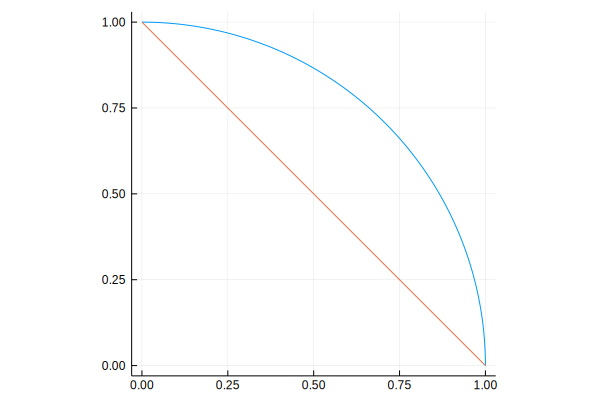

In [4]:
plot(domain(f); ratio=1.0, legend=false)
plot!(domain(f̃))

## Orientation of contours

Contours are _oriented_: there is a notion of "left" and "right" inherited from $[a,b]$. For closed contours, there is as notion of positive/negative orientation:

**Definition (Positive/negative orientation)** Let $\gamma$ be a simple closed contour and $z$ in the interior of $\gamma$.  We say that $\gamma$ is _positively oriented_ if 
$${1 \over 2 \pi i} \oint_\gamma {d\zeta \over \zeta - z} = 1$$
It is _negatively oriented_ if the reversed contour $\gamma_{\rm reversed}(t) = \gamma(b+a-t)$ for $t \in [a,b]$ is positively oriented, or equivalentally
$${1 \over 2 \pi i} \oint_\gamma {d\zeta \over \zeta - z} = -1$$


In [5]:
sum(Fun(z -> 1/z, Circle()))/(2π*im)

1.0 + 1.2545118101832475e-16im

## Cauchy's integral formula

**Theorem (Cauchy integral formula)** Suppose $f$ is holomorphic inside and on a positively oriented, simple, closed contour $\gamma$. Then
$$
f(z) = {1 \over 2 \pi i} \oint_\gamma {f(\zeta) \over \zeta - z} d \zeta$$

In [6]:
γ = Circle()
ζ = Fun(γ)
sum(exp(ζ)/(ζ-0.1)) /(2π*im)  - exp(0.1)

-2.220446049250313e-16 - 0.0im

**Corollary (Cauchy integral formula for derivatives)** Suppose $f$ is holomorphic inside and on a positively oriented, simple, closed contour $\gamma$. Then $f$ is infinitely-differentiable at $z$ and 
$$
f^{(k)}(z) = {k! \over 2 \pi i} \oint_\gamma {f(\zeta) \over (\zeta - z)^{k+1}} d \zeta$$

In [7]:
k=10
factorial(1.0k)*sum(exp(ζ)/(ζ-z)^(k+1))/(2π*im)  - exp(z)

UndefVarError: UndefVarError: z not defined

In [8]:
z = 0.1
k = 5
factorial(1.0k)*sum(exp(ζ)/(ζ-z)^(k+1))/(2π*im) - exp(z)

-2.2870594307278225e-14 - 0.0im

In [9]:
-sin(z)

-0.09983341664682815

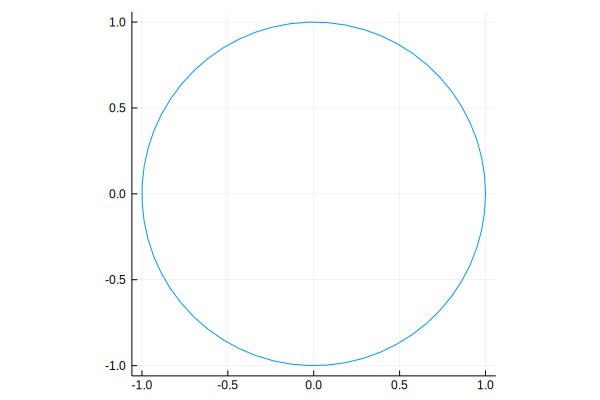

In [10]:
plot(domain(ζ); ratio=1.0, legend=false)

In [11]:
k=3
z = 0.1
factorial(1.0k)*sum(ζ^2/(ζ-z)^(k+1))/(2π*im)  

1.1754541892225352e-15 - 0.0im

### Application: Numerical differentiation

Calculating high-order derivatives using limits is numerically unstable. But the previous formula tells us that we can reduce a derivative to a contour integral.  The example above shows that it's still numerically unstable, but we can deform the integration contour, to make it stable! 

In [12]:
h=0.000000000001;(exp(0.1+h)-exp(0.1))/h -exp(0.1)

-5.4919363766892104e-5

In [13]:
k=100
r = 1.0k
g = Fun(ζ -> exp(ζ)/(ζ - 0.1)^(k+1), Circle(0.1,r))
factorial(1.0k)/(2π*im) * sum(g) - exp(0.1)

-7.993605777301127e-15 + 3.675487826103639e-16im

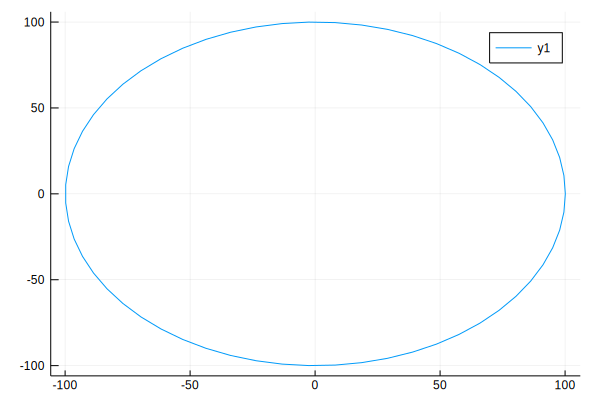

In [14]:
plot(Circle(0.1,r))

[Bournemann 2011](https://www-m3.ma.tum.de/foswiki/pub/M3/Allgemeines/FolkmarBornemannPublications/FoCM_Stability_Cauchy_Integrals.pdf) investigates this further and optimizes the radius.

## Taylor series


**Theorem (Taylor)** Suppose $f$ is holomorphic in a ball $B(z_0,r)$. Then inside this ball we have
$$
    f(z) = \sum_{k=0}^\infty {f^{(k)}(z_0) \over k!} (z-z_0)^k
$$    


Examples:
1. $\E^z$
2. $1/(1-z)$
3. $\sec z$
4. $\sqrt z$

here we plot the $n$-term Taylor approximation of $\E^z$:

In [5]:
expⁿ = (n,z) -> sum(z^k/factorial(1.0k) for k=0:n)
@manipulate for n=0:50
    phaseplot(z -> expⁿ.(n,z), (-20,20), (-20,20); ratio=1.0)
end

Interact.Options{:SelectionSlider,Any}(7: "input-3" = 25 Any , "n", 25, "25", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(42, "42"),Pair{Any,Any}(29, "29"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(20, "20"),Pair{Any,Any}(14, "14")…)), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -20 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
 -20 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
<image width="364" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAWwAAAFsCAYAAADon4O5AAAgAElEQVR4nKy9e3MjyZXl+SNAPIgH
ASLJYiWVlamSqqVWT69sx2a+/yfYsW5r67YeqVWVqlSKWSwiQYB4EAQIcP9wP+7XPRzM2rWBWdAd
zghHPE+cOPdcj6NfPfPcB/rAa1/m9TembQj0gOYYmAFz4GNWznx9CixMfTXwPQx8r/r+1pdqGwDv
2DFgBvzou/wRmBTq733396+AkV/8W18fmbptO/3se5gAf/Hl94W2Mb/lmRHwO7/oOfAdcAGcAb8H
+o/An4CxX+zPwK3//p++7X3DL3UO/MGXF6bu2ic0+E+/+A3wv315C/yHL59+D1z6xf+br1+a+tnf
/VI3finV/w244St+Cov80Sz+R+AKuLwxi/yrL6/94p+AyZU/Iy6B/+7L16H+F3pc+8X+ly8/Af8C
/Fz3s2nx/2kW/x/A8We/lO3hE3DDKf/FlVn8yi+ixYff+8X+1ZefgP/HdzOu+7n1w//D9/B/A1fc
UONf/CLXfl21zg/DZFa3uOr/tDHr+q+m7no4529h/f6YLX4JXHwyi/xbYb9PtMQl8H+Z+j8Dl9zy
unKkb31XY+D7Ez/7uTk/dN6oPFmSnmE6cdU25ph7/kB6Bo+IZ+8IeLdCl427Bia+i+99qbYJuKtI
F+RvfVltm9PgPfGqnPn6e9OVMODpG9z1PwLeEfFAdUHNAHi19EvlKDPz099M3YHbazb0iGjV911d
+dJipNq6e398F76c++lToX7jy4Wv79pAx/fc5XhO/PSzet1P86wNYNQBdtmCfd+2N3X87+2A1cr3
UANUr/u1q/u2hp9W1GnQoxO66gBb372t9339Pl081ueFttMOsPZTF3j0vaqt49seWXFP2y/e9mu7
ApZAy9c7Lah3/Ze1/4e+q9v6FnZL37Ayvdi2Rzo0aPnf6vquOv67ysWjWVU7PfqJtpm00S0/tZNF
ttm0BmiaSYu3zXc2ZomNP0L6vqPmZ6ubsuZL9sTzRHXMd7Bzm6XdZ8cv+OQz7dWnPjr3Yv9apZ1Z
PW1VsgHaOE3hTNS+SPdoI5s9n5KD8GimcDBa2GMXJ3c22EOv+sp/X+Fn00nUNYtqOnnGnYMrU+bT
MllEUz+rZ4u4a29lSk3FnuzUA/qsaQRMOzTpp55ODnbjyl7W9sWeF8n3Ew/Wpe4Hvhxmbd19sav0
+6H/7dqmN7enjwWbWn19lsTTu19oG3TicvRwZ7ZK27Y3HUy2sF35Xua+tPVqW5M6fVpsfTe6LGy9
g7tMjh/gKQdpAXXbtLVxR/dYUN/zPej7lgjia5bc0/KLt4kgvfDfBbd9nXePpPcAC9xzezZHkI6X
3JI2HbrUWBGvMwvabWChq9KCtL1ikwtbU0TgHKBz8KbFF1Amh/kI1gKpEsbVgONneLLImE/JUuEs
Awyem89BAN+V/mn71vdaZRXye0rx7tPU6m0oAXUJsHX7bJnvCVCXDkjxWEbQtod+RfUeHk6efBJw
hyVztI3g3WJHH3cql7rSFMC5hPsCpHWdKkirB4usncqitm6nh3q2aD+r51NzQ4qOeZmiZ4tNBahL
4G3bAljbaVbsPtbt98IGHD9xwR0L5jwEjrsk8t6cXauthgOoYQd3RndxZ3gX95QhJBW7FiWermG2
xp3tOhxt3EnTKLQ9cslbWv6bAFN1zSUQnd17MNPvrf3K2zat2+gUTiy6L4iwMkOX2T0ztjwwJF7I
IyIWjHx7/5yIA7Y+NuVuC6sJcEe88m+Jn0ugzojzwO5GRA53hoOG8YSIAlMiAsz8TnnqwvHAb7jK
WH+gyYwNXb/VXT/N/a4J187S7z/9I1yZ4m/rrO7KErRYwHoSSFWxHk6apMCag2wKql/8hBnFqtWf
dmAz9GdXRyC416w5wRXpLWy/RSpBk8BO9T7Q3pJewFPSi3vbJl6wg8q0phVkAUmEd36aAHdHRIUh
ny58GXS8W1OOw9TiPoh3Ulb0/dy0NfUYr25uTNdqn7f9j575JVW/8nW1jbg22/XJ75prv22qSx4J
i0uHGJm2gal//UyUQUq9qYxtxyyD1KHu+1n9tWnrA30rg1i52LbZ+o0pww3sinjGXAI9jkV/n4A5
D+hj2facVBrB/w6+vS/NQkza1sWw96Sse15i2LmOESWTPr0gjexMl+LCYt1bYLuBx3nW1SHW3T6B
o1wS6Zu6Q/oH1ix5Dteo2PXcdLVpQFNs2t4k8mm1JmXYlhctgV5FAuma32wDtQ3sRc4fsy6Eoccv
MbMGWzZhdnFEkbo10M4lEUsTDzBrlRYOBY8WhsOsVhZJ6LMF1livzPZ/6FOSQsJviUnncog2MpFE
rEzkykMMO2HX2umWbb8oh7gpZ9NLU68oD7kUEm6+h2SQw1KIbji6Upq68Wixhflu6XFgAv1CPbLu
HZ2EeC5NPSenRSmkNPXIlrR0VyBte59RY1mROuyts5+1BbBWF7bLl6SQqfZPia93fO+dCNhuUyJg
9yCp17M2gXcdLwWUQNrWLcomgK1bgS2tru0AvU6DPq0AC1a86JnuAztaEcFGxDmANCl4n1pJRKe7
eosUfcEyLC64VVcC8VF+Vq+onukrvJ5vwVp1h75WcswlEXW1SDE+vVLXQNde7HZy0LFmWcEIixtt
K4tY/bqB3+OHZIB9AtQ5cNe0+CGUTLTm/5+fIvLmbD3WS/eOQMxzzTrfsES/T6cauySCcFBZsgfC
fi9S+jhZNczeu3UKhLt9fvdXd8cbDgG1kNeeh4d07ES7sIvPs/8lzxd5vR96zME6VwtUT6SQlzQK
oWlRm7BySGyvsQyL5d3kQF0Ba/u0lKssh+TydT37tXzqcBzJ/JwnCPII5nd0PNQmFbrvd2a9Br2B
0WysDJJLImrbAIsZrMWqbbn0dR11J3xc8o4WNdq4E1MgJnlEmm8bWE/h4dH/TpeIx2IuVh7pfwVH
QnZdnVYecTeXW34Il+aAVB5BZQ1Gl7gnLX0kiVyYth/HhRlA8kiTS0YMQv/icJJiBsB2CY96Dhag
3vlyBrSPoTvE8QNdzn2/pwY8sWLOA1NzWCSPzPE3Yp07c19PnhTyi3sdvus45KWm+3J8zoNUlCpy
qE9wvfQpUfCDkki8A5VWQ6sXNsDevOwGFfeBQygbmLOSSCKH6MKeZd8rkDBMJiuFlKanU6ryxzlO
gTgHzp6I8sdtNo2BG1rcJ9KH5A8rj9TvkkWiqnJjur7Gb4OWGuGwZ5TUd1yG9f/ZbMu1KSWDLE6p
yh+vTZscIwPg1cbv2I9ENi2hxUohsU0ySMkFkksikkKCzKHu56b7OWVnyBzY2p56uLPlNakk0k8Z
9kvyiGALIlhDKpV0RcEtm8bUSzLJbgtb+ws5626Y9hV9eom6ontAzrq7wFZByFwSaZm67hFdezmp
V7FrJ5k8ccKKh3BzsPEVaeiqd0vPkMljaEnvTMNGbfq0/Q2qxLJbwGNOqfKpwrKtotzikYeE0Eke
SWSRLwYerRzgENMuVuK0lcheEuFLA42HApC/WL9OPlU9HOoH3SFbu4jd9uRpI5eFqgHHXMMPiz1m
ZeL0yY+ZPY6d4uFOgo061+IikWF34bAMUpVDrGhROZUtU9RFscjakBbfy3pMmfYvIaIvxOSqDFv1
g3pEOdjY47ni+DjEqgN5n1GVQUpEPp+2D

And now the $n$-term Taylor approximation to $1/(1-z)$:

In [7]:
geometricⁿ = (n,z) -> sum(z^k for k=0:n)
@manipulate for n=0:30    
    phaseplot(z -> geometricⁿ.(n,z), (-2,2), (-2,2); ratio=1.0)    
end

Interact.Options{:SelectionSlider,Any}(11: "input-4" = 15 Any , "n", 15, "15", 16, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(18, "18"),Pair{Any,Any}(30, "30"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(16, "16"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(21, "21"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10")…)), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
<image width="364" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAWwAAAFsCAYAAADon4O5AAAgAElEQVR4nMy9f3PbOrYtuCyKEi1Z
sZOTdN7p1/26pt4HnO87U1NT992u05M+aceOLJoSTXn+ABawsLEp+/StqRqmGGwDJEjxx8LC2hvg
Ff7311esAXQAbmOq9hrAJ6d8+wKgBzAAeIz2A4Cj2Cy/j/n38e/esUP5NV7RAfgcD7OJh2e6NXlq
f5G8zwBWY6z+O4BDTPu4/m7sJ5P3Le7zBGDYANjFWnfxCF/j2dyI/TX+vQXwa9xuhwG32Mcq97FK
2jb/t2j/I6Y9gPN/i4e9AfCXaP9Z8tT+a0z/9BLvC2t7iPbf45H+M6YPsTxse41/4S6e/Z0c8i7e
fh7+L/HvOwCf+lj1Y6ye6YPJexB7v4s13MaTvpUj3AH4H3IGfwNwiwPatPt/yNn/L3Mo5h2vi91D
dX+ZOdQu2tt/yXX7D1Prk+SxfI//jgk7U6VeI6Y7KceTVPt3eQD+U6q3t2poYg03UhsfhptY868x
b5fsA27xFKv8LVZFm8+f5vF2/gPAsYnV8xX4ivyseY+9tVcvsbbvkvII9oXzXsxgf8AJW4Q3cBOr
p0282AL4iMsYcXdGCUvWJhR55QphA4AfYvdNPIIC552c4S1qYL2LaRcv6lxe2O8EYIkBeenEXsd0
EU/Ulm+WwBUzjgAm2YD22ezI9DxjdzjiGY0ckrami3iNFnEd46p5RwBNCzS8NjylyZzeCKCV66J/
jzEdWPsYa25juoop805xm1PcvgUwoo1WK1XbPG/l6Rz5A+16Mn+fJQ+N1LSI6UryVpKf07NUNcWU
tuZPYqMx60Ju3kJWW55q17/VnqBLg39jsTstTJk917TwF6rNX655Z/fn84pqPq98usgn5Eug91Nv
wkn+Lu6d98Qs3Hz7qNjH5mj+HsRGh/wwarqK6zqunt1Cah8k1XdpMGWaF96tBU4J4sgXabdOnk11
rU4jH8Yvs+Wap3b68fYM2pn8uV/k5XXp1JYYkR9qC95EycEpHwB0K+AKCM1QFzfmE0gQZ2X8UYj5
tBWwW5wxYcApge+A8IARmAexCeCDKde8LX/zGRm4zyjRs5M8gnor2z/qo02w5tFalI/9UfLCNg3O
6LAoQFhB2XsF17Ld0XvL7DqZv1+ugCUhQ19oCykr6MvOqiapVuGKOKJ/F9XCHKIxebQLMJ6cv2H+
Phc5/xZ4686N+TuBtf5ie2y9EiFd4NVtk1qUV1nL0oW1wG3BWtMJ0PuUm4NLIB7yLj02CtIK1EcA
58ZUx4d1bdI5++oUf9xboK1oeYJFSB/C8il5wOxBZmo/FITt6ViQtqet7QztqZk5Qz3TS81I6+SV
vzoD9mM8eIeSrjZykjDpBhkVuxVwfYsMwIp0bdyIAH1G0BnaaPfR5raB0r6gxyMO6VRaSTdxzxXy
c8zylZTzaGcAu52cbyM2n38if4/8lvWybQ+g74FpH3/jOR6JwLKJ6RPyy71FXvbosMMuosIZobMD
2ZJ7MZ81TQCeDshvPM9L8/hb2MC2cbsPbB6YjvFcbR4b2xFnrFKDyVw+n2v47cZsF4EvPMm8IlkB
+RYIgRo487KocvLi7qENim04LAUumPQJ5XnalvFcwaPtPXnA4jI8pr0pozqQathKyu42O/5byQ/r
CW1SWyjBqb1HeJR4GJYfgKyscL1BVmM2JvXsJOpRL+tjyiM+OEd+THkLHNIvsYfcIogLtG9MnooP
GwDbsxymj6egCi5xkIcf4Cu8PP1jrKs6mkoaqiHzzOclj3qfm/QY7OMh35ZEgBq0G7EB4Jo7kmnb
yizFhbFJa3N6RI8FXgucJa4qg1ZmXUki0d6pJML3T98olT/4PqpkwvJJWbWmegaURsgU2lTeYuNK
IgqEbkd3As7voUmKphOEZSuCWtqkecHWXvokqyV8Cm2NJe8KjB5QVqwapkZ/eS+znq9BzolrtadK
NXoFtG8RVtsOKf6r6JTYtTJnrcp2bUaTV7FoX/6w23mPhieJDKb8CKnOyiC2JfLs5QvKlsdSVEtv
j3Jkn1nPMW3LXT2+WskcVpF5Swbx7Ooob/H9dsb26/FOpQTst8B7jfyQK6CfroBVZ3airUBNFISx
Wa4g3uKIUwHUCsi0Nd/LY36nwMw7ypeG1EgJqdosHzyQVvDWPGrcOU857VuSiF1ndexLoD0CWCoY
z1FgBYBFhRVn1Pii8uoEoFEGC9ToZUEbQMmq5yBW5Yc/uFhZ5l3bWR1dVz2fcE6eft2ibrd4tV1Q
tsTdlhe1vOdpCeuERaVPvyWLpL6D9vKJLYqa+vB6dlWrl3o6RAZtD6jnYHAOvFOv5pIGbZFxDsit
5P6HNGk9W9uk1NtOaN3TDJKI1amVJNP7x3Q0eUTG7gr4QDqvMkgbN16hFI9JcwljrZSHvDOOeMIB
C0yFNKJbW8mEr5LK1R2AaQFsKY1wB/VgEmMV8RH/pvzQj8D4GGum+AJkScSTSQDKIx12CXaeTCkh
i7WypmSfgBd26VSyoc33uY+XmmpTuwKWVv5gyievbK3OGDGKLDLIFkeTx8dhpThi8cSKuy3gSyG2
eajlkH97sbKIt169IqOlOpA9lD1hganqKXlSiGLeLHBofm/s1PEnfPnyR7luK7mDtpVE9iiFiecG
pbRxg1oe8SSRGwAfXlHLIAfUYkwPlT+sJHKN1+JQtyadk0c07wYSKfZgDjmg/OEqiQwmT6WQR8S7
SXljLgpEbY3+YMhd6247RRlklMNTffn3GbbmaRTJZgksbQVnlACOaBPA1eloYTZsO+KQnl89pI0Y
0TwrnzQAtlYSUeKv0ofil3YMOgDjhDIyRG1l2sowTsnusKmkD5VELJzqdi+egKyRIbMse45hK5q2
RcqqLaOeEwcKicFGhKhU4i6lzFDLEP8fLPbcEv31jued33m2DfBkksSw7YVV5+Mc236TXfuMe45F
e4+Rth9Fdd1M9R7zTg3xYGrmO3KSsjl2PWAdQ3ttA6iNn8eqLWddMfbBo6pvRX7MMewE1pdY9Ftl
89vOqS+0lwlsAV+3BkrG3Zg8ZaNHACBoKzgr4jHPixhRRO1SegwukCK8z8ofjZNn9ezTAlgRlFUS
UXqk/lJFT5VSBlX/KHvoA2rlEW47osEZLRapbWC1c++EgvvRatmXgFpf+msPpBfmqAoxLSY8F20C
U6ttK3A3nj4wx2oB2fOtJRypUlTes7wpy8wf7zLznwpAtqF8c6DtyiG8d3qBC0nEAvP75BH7VL5H
Hjk3qHvvlwIfVvJ3B7wtecyFX4TyJSYXyux7MSeP6L5uL8bTpm1e75QnxvieI8+BtAX6WgZ5SzZf
4gG19DEnjwDhwfIkkySNAOiWwPYOGbCALIPw8p+lXFl4K3mBtZ4x4hkDHnAqQM7KIzbP2h2ATQt0
t/F3eJLICmUroBQ+tQIT0D+glD8mlPEeeynfxfwbAMAWO2yxSFCgESOeJMLyM4Anyh8aJXKLjAj8
Lb3kpWgRdh+2KFsjlUdCvsohlD/UZhOkXKrxiPucb6wBMHmA6IFlubyFuYkne9q1FzGSKvS6K/Mt
pBJNhU6PCSYtdQ4IaB9M/tggyyEaDVJLIJoesCjEhrckEa5uZMh78naQQTIaHWLtOUkkaA5WBtka
WyURtSk4UKRojigVGUoalEaOqANWdB8rjxQDY1QG2

And here the $n$-term Taylor approximation of $\sqrt z$ near $z_0$:

In [8]:
function sqrtⁿ(n,z,z₀) 
    ret = sqrt(z₀)
    c = 0.5/ret*(z-z₀)
    for k=1:n
        ret += c
        c *= -(2k-1)/(2*(k+1)*z₀)*(z-z₀)
    end
    ret
end
@manipulate for z₀ = linspace(0.0,3.0,100), n=0:20
    phaseplot(z -> sqrtⁿ.(n,z,z₀), (-2,2), (-2,2); ratio=1.0)    
end

Interact.Options{:SelectionSlider,Any}(15: "input-5" = 1.4848484848484849 Any , "z₀", 1.4848484848484849, "1.4848484848484849", 50, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.030303030303030304"=>0.030303,"0.06060606060606061"=>0.0606061,"0.09090909090909091"=>0.0909091,"0.12121212121212122"=>0.121212,"0.15151515151515152"=>0.151515,"0.18181818181818182"=>0.181818,"0.21212121212121213"=>0.212121,"0.24242424242424243"=>0.242424,"0.2727272727272727"=>0.272727…), Dict{Any,Any}(Pair{Any,Any}(0.333333, "0.3333333333333333"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(0.484848, "0.48484848484848486"),Pair{Any,Any}(1.87879, "1.878787878787879"),Pair{Any,Any}(1.15152, "1.1515151515151516"),Pair{Any,Any}(1.60606, "1.606060606060606"),Pair{Any,Any}(1.57576, "1.5757575757575757"),Pair{Any,Any}(2.30303, "2.303030303030303"),Pair{Any,Any}(0.606061, "0.6060606060606061"),Pair{Any,Any}(0.030303, "0.030303030303030304")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(17: "input-6" = 10 Any , "n", 10, "10", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(18, "18"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(16, "16"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(19, "19"),Pair{Any,Any}(17, "17")…)), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
<image width="364" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAWwAAAFsCAYAAADon4O5AAAgAElEQVR4nOy9TY8sSXYldl5E5Ee9
YrF7CiSI0RBDNDQYgNppN9oJkgD9A230V7QS9D+E2c5CewmCNgIkLQYQIGFICEOBQ6nBVoNks5tV
Lysz43mkFuE3/PiJe82umXtExqvuC7wX5mb3XjP3cD9+/Jh55If/Em9vBwDD+M/Keypz3VCotxiI
7+v4yXWHLQD7dwdgM5Y3VGfbj+Mn192LL7dvATyQ7x353Tl9cv476f+OfB+dMd2TD8c/iK+17d7G
o/BCR+aZjp6Vn+novdDRs3ar0/Yn+txL+QDg01g2vz217yn/sW6HN3yk3fw4fvIufaTy106dle+p
/JEOr+f76OTcjO33oF3mIfPua7vt6gumk519+KvgE3uP+YlbOrGB+UXwOn4eqJ3LIN+SbcbPrVPe
Spk/9VzWa8hr9z61zszbbrFBtg9Sf3B8+fh5dVo2Py6X4qKYUt8t25B6BO2B7fj7UDuM9Xtq30hf
fP5YzODUD+R/ALAfgMNBGth4mwdwwDz5Qfz5jnGQ+i3mF9SGfLm/g3yar/V358Sw2QE4UNzJPgDb
HfChdgbxGcMD9gbH7Xz3Aqadth21+jtMxmU7QMe6z9hjj7dZq0VsaET2z3Z9D5zFcE9Wtxlj7NBa
/T3lfKVY2763zu/GCt0tbo8AktvvKc9efAeJMbPv1Q6GDXhLOfXE5xzs6xmfN3pB1cCaCVHWbDxR
G5teb/ZFemNn8/bVA2YvRm923rhK/emldg2z7z0CQjM9XsGx3On5zOcPA7mei9ynjodjbNsD/OEN
OAzA4RVzxNcEkLqoXXdafRl0OaftrAI6m13I0cULqVdwtz4s/z0jSw2wvW/ZO8sZqBkaGZAP0h6V
pwOxP0HmOeACoNY8oHsgbXF607+j7dPe2He9xwS2fNz5e9aTVsHPPu8xP7wWY4PyQHcrB0AvKI+I
ROBn/WpMBNwe8y0x4RJ4D9LOX5TlODhl3bZ+M4wxAmrvRukxUq3z2HXJsr7eTbV0o9V27zsv1Vu8
Y7uHsaBPe3zh8LVh7QzQVr+hGCMXLJVsKZ59DwMwDMBnY636mLZ36h4xv0CV0XqSxyDxBqCW19pN
0rDx2PO85dxTnZW5jsfCsdz/8AG4uz9uf7CBMCzZgPZUx2BrdXspg+JfqWzP/RYPibmT+Kn9MwYc
MMy+QzucjI0eGHMMnyMaY7aRPPeYFA0+FzebkWUD50DCSfhJa09JbBftkLAGyBeS+XlMxMp8Mtt5
MOD8AlKQ0cfryLZS1hsO3/s9KaMkY/A+8FhKYFIyBviaj45B20vHKpIeorbaMU5KEmdAzSe0njse
aHtMW61wQ9/xUxs/2Vl//D1qu0ck+NrwxqDx7Ht4w1Emsc69YDPDKY/xaJ3H4BmguV4vWvNlrOOd
Y2ZufpHOpDmt35Bt61Wkt1JIu/rCKRtI31PdHfl5ksk9DnjFHsMZpKun4qD68u3Ba2cpxOSPO9rm
c3UAsOWbJZxP7oAvGL6BWnKNq0kqkYSQZV6lOm5j43NH73TKpD35JtpW865DbtM7M48DyAOgx5zV
amBdivVuOpeWQzKMuvSdR0/uGCURxqQIkBmz+Hzwnko89QI4B3zFLcCRSRR8VQaJ2m1b9UiWKXQH
mI1tpawXB++wPpoenBger+745gN9EzxQD7D52QXSrjuqdcAcnLUOUA2b2w20zYt7r8kffEgPiRgG
dvZlwmu25RPS/vG5w6CuJ7Ul8w4LxzNIaax3gbHcoizMM31a4DrNaW1bpxx9evnU9BFJ25jkKGib
lcav7Zrf84nAWnPWwPySVvp+MzfjhrHuHjDtLz/JcXnvtG+cuL3UHaTe8uiTA8ef+hxlkgMIvD2Z
ZINJhvBkEo6zZQevmK8yMfmD83vAfUf98ooQPYm5jlePaE7D6AHA3TgZeb+VxCxp8NkbSR4cX5M8
bGAQXxbd+Vlvgxc8YcDbDGi3kokVKCWxDOAcz+eFYsCz+ALHBR6naVX7/oDz+x0fNu9mr09V1qYs
VZmI90hrJzmzd5VSuGw70AIuOi6VSBTElXDUQFu/pAwAKTMzi4A/6tfz8YA8Au+onS+bKCZjLTJR
SRrRfmtPO2Q7xhGPdPL3v5e6QeJsHKUbq5JLJSie7HNaUaIdcNn0ZGXdXpzKJ/pYobl40NEYPIDX
L1fZlndATmxb9RpzViaOoMxnusVY2T5ZeIfTrnXHsq4cUQbN0A8q9zBw613xgyc1BxDLNrVHZRC+
eMw8ENOT0XLAKXtgoiw+shLzKpmOj89l9Skx9IzpxazAEJ2ibKV99MAvC9aZmNI4ljBw3vdsHvVt
AX+ys2V9iiX6PTCDVqyxTz6H9AlSsdG74Vgbxw1v46SkHSgFUNNrIsBmWqc74+0oxN8OzF7qNK+X
00zZu/Vx9nj9gW6lwHxwNcDWZ0jAB2wDaV1F4mvY8/ZpEtKeATTaA2ae9lRA5+cJbWdAZxxmQrtV
4PJuiLZtCTzZgMseA/YA/Zrm7YvKL5Gfl8OsxrRqEon6R31HIFUCVC+mlW232BpgDvjsdyFo7z5i
uqhYHeVcjJOAL3+opOFJIp6McqA4jVf5Zf82yiTjvxNw86IJlUlM8ijJJAeKMeLJufTk3Ej5UKjj
F2t4zKx22A5vqPy4O27veOcsAcsgukpk49TZt6iL8lgmMb5q7QeqUw68xQs+YY/hdBhZsuDvl5kx
k11vTpDPMY+hM6a8Uj8n1X2D4yTkBkdd5tUJ1Mfi2ioRjtOnKv4e9aaturme1JaT+8iad4NRoNYb
VcvNxQNvBbGNU6fGTzZRnlKbx0NKddG25quBfI+VJJAaaGfHsBGGrZKHsmmrmz3BYy6JRONRoqus
jAlnRJC5LnzxRik+MF8RF93VvMfiSObQum2hTvvQ5/2IbZ/ijW1bpXc2emXeSV6FUpM84knHeXmL
Aw4Y8DZbEcK3FDNm2t73X5NJIl9gfkQ2GAEbOP8+LJgBjX08JulJCyW2p9YKxC1WYtp6Lnv1GbMv
0wNwvQnqmLg+04/m9tpawLplHGsx6shqoK2+Bdt9hM+K+Rx/DdptDNbO42DCoqyLWTUzcI33GDiz
dltRsv8BOHzAfNLQZr54MpF1HF5nbWxcJxWVgXsMugbmzLTsk1mY7fSL9GW+J7a9G19r9xi0le0o
8uQj81MVHJSBq2ChrJyZ9/Fb+Iw9XvB6dl6Yh7Jtj2HzOuuN+ClWvFIM33pOmGUsW+9hyhg80+8Q
mE44vbHydw6K8fLrTUNZTCPLmlkLcGubx7oVpL1tUB3nXgJ8NSbu8ZTScVJlMGLda1rEsj3rnMM4
MewSK+a12qp3D4jfwNVzXBm8Xhccr4QnIqSn78E0bjOdgNQB8qd1xBo1x/BgWdbwLnBvNYga54rW
Ourj7Bnb9q4chkJl2PxtAmWGrXW8OpoB/FinDJgVJb5N2KiVYavgwuDP5wO38bbdVk4EQZNFJ5wm
NR8zT+OuPZ2xlQAlstINxUyB1huzAvQapqxaL14dSyaf2ppsuwSIETO/FKB7T/YdoH1aj+CBoIdr
esyY73nj0vPGrg3FKQ/wWUGwWJ1XGbj9DTjwMi5NZkHejnFyj/lspF0Bm3ea6/RxxMagO6I7zRMG
DDTbHfABmH9LDOLeTJm+HgX4U4Vc5jpPStmeyge8Y